<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Привет, этот проект тоже буду проверять я - Сысоева Вера. Поехали.

</div>

<div class="alert alert-info">

<b>Студент: </b> Вера, привет. Опять спасибо за мгновенную проверку проекта!

</div>

# Телеком — Определение неэффективных операторов

## Загрузка библиотек и данных

In [1]:
# импортируем библиотеки numpy, pandas и модуль scipy.stats библиотеки scipy
import numpy as np
import pandas as pd
import scipy.stats as st
import math as mth

# импортируем библиотеку datetime для работы с датами
import datetime as dt
from datetime import datetime, date
from datetime import timedelta

# импортируем matplotlib, plotly и seaborn для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go

# задаем функцию my_info для получения первоначальной
# информации о таблицах

def my_info(df):
  display(df.head())
  print(f'\n В таблице {df.shape[0]} строк и {df.shape[1]} столбцов \n')
  display(df.isna().agg(['sum', 'mean']).T)
  print('\n Типы данных в таблице: \n')
  display(df.dtypes)

# для игнорирования warning-ов

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-warning">
    
**Комментарий ревьюера**

**#можно лучше**

Лучше придерживаться стиля PEP8, а именно:
    
    - подгружать библиотеки в отдельной ячейке кода
    
    - делать 4 пробела для отступа

</div>

<div class="alert alert-info">

<b>Студент: </b> Вера, не совсем понял. 
    1) Отдельно библиотеки и отдельно свои функции?
    2) Пробелы в каком случае делать?

</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

1. Да

2.

    def my_info(df):
        display(df.head())

    или

    for col in operator_miss[['direction', 'internal', 'is_missed_call']]:
        display(str(col)) 

</div>

Фалы на Google Drive

https://drive.google.com/file/d/10U0oyludhe24IW4OqbkXn7n-xd5gtT2e/view?usp=sharing

https://drive.google.com/file/d/1gt7z2IbdPZ6_2oPFVWmxNlC_wN7qMSrN/view?usp=sharing

In [2]:
# загрузка файлов с google drive для колаба

'''! gdown --id 10U0oyludhe24IW4OqbkXn7n-xd5gtT2e

! gdown --id 1gt7z2IbdPZ6_2oPFVWmxNlC_wN7qMSrN'''

'! gdown --id 10U0oyludhe24IW4OqbkXn7n-xd5gtT2e\n\n! gdown --id 1gt7z2IbdPZ6_2oPFVWmxNlC_wN7qMSrN'

In [3]:
# записываем таблицу с операторами и звонками (основную) в переменную df

try:
    df = pd.read_csv('/content/telecom_dataset.csv')
except:
    df = pd.read_csv('/datasets/telecom_dataset.csv')
    
df_len_start = len(df)

In [4]:
# таблицу о тарифах в переменную telecom_clients

try:
    telecom_clients = pd.read_csv('/content/telecom_clients.csv')
except:
    telecom_clients = pd.read_csv('/datasets/telecom_clients.csv')

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Сейчас проект работает только в твоем colabe.

</div>

<div class="alert alert-info">

<b>Студент: </b> Поправил

</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

+

</div>

In [5]:
# смотрим информацию по основной таблице

my_info(df)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25



 В таблице 53902 строк и 9 столбцов 



,sum,mean
user_id,0.0,0.000000
date,0.0,0.000000
direction,0.0,0.000000
internal,117.0,0.002171
operator_id,8172.0,0.151608
is_missed_call,0.0,0.000000
calls_count,0.0,0.000000
call_duration,0.0,0.000000
total_call_duration,0.0,0.000000



 Типы данных в таблице: 



user_id                  int64
date                    object
direction               object
internal                object
operator_id            float64
is_missed_call            bool
calls_count              int64
call_duration            int64
total_call_duration      int64
dtype: object

Сразу видим две проблемы — пропуски в ключевом столбце _operator_id_ и неправильные типы данных в 2-х столбцах

In [6]:
# информация о второй таблице

my_info(telecom_clients)

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16



 В таблице 732 строк и 3 столбцов 



,sum,mean
user_id,0.0,0.0
tariff_plan,0.0,0.0
date_start,0.0,0.0



 Типы данных в таблице: 



user_id         int64
tariff_plan    object
date_start     object
dtype: object

В таблице с тарифами некорректный тип данных в столбце с датами. Пропусков нет.

## Подготовка данных

### Обработка пропусков

In [7]:
# еще раз посмотрим на пропуски в основной таблице

df.isna().agg(['sum', 'mean']).T

,sum,mean
user_id,0.0,0.000000
date,0.0,0.000000
direction,0.0,0.000000
internal,117.0,0.002171
operator_id,8172.0,0.151608
is_missed_call,0.0,0.000000
calls_count,0.0,0.000000
call_duration,0.0,0.000000
total_call_duration,0.0,0.000000


In [8]:
# посмотрим на строки, где есть пропуск в internal

df[pd.isna(df['internal'])]

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1007,166405,2019-09-18 00:00:00+03:00,in,NaN,NaN,True,1,0,59
1090,166405,2019-10-01 00:00:00+03:00,in,NaN,NaN,True,1,0,1
1864,166406,2019-08-20 00:00:00+03:00,in,NaN,NaN,True,1,0,36
1924,166406,2019-09-02 00:00:00+03:00,in,NaN,879898.0,False,1,2,9
6210,166541,2019-09-26 00:00:00+03:00,in,NaN,908960.0,False,1,393,423
...,...,...,...,...,...,...,...,...,...
52462,168361,2019-11-09 00:00:00+03:00,in,NaN,NaN,True,6,0,14
52590,168361,2019-11-13 00:00:00+03:00,in,NaN,NaN,True,2,0,6
52621,168361,2019-11-14 00:00:00+03:00,in,NaN,NaN,True,1,0,2
53717,168579,2019-11-09 00:00:00+03:00,in,NaN,NaN,True,1,0,18


Ничего сразу бросающегося в глаза не видно, делаем скидку на малое количество таких строк — всего 0.2% — и удаляем их.

In [9]:
df = df.dropna(subset=['internal'])

In [10]:
# проверяем

df['internal'].isna().sum()

0

In [11]:
# строки с пропусками запишем во временную таблицу t

t = df[pd.isna(df['operator_id'])].copy()
t[:5]

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
7,166377,2019-08-05 00:00:00+03:00,in,False,NaN,True,6,0,35
9,166377,2019-08-06 00:00:00+03:00,in,False,NaN,True,4,0,62
17,166377,2019-08-07 00:00:00+03:00,in,False,NaN,True,2,0,24
27,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34


In [12]:
# устанавливаем phik

! pip install phik

     |████████████████████████████████| 709 kB 2.5 MB/s eta 0:00:01


In [13]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [14]:
# посмотрим на взаимосвязь между переменными в исходной таблице df

phik_overview = df.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['user_id', 'operator_id', 'calls_count', 'call_duration', 'total_call_duration']


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
user_id,1.00,0.53,0.10,0.18,0.91,0.06,0.08,0.16,0.16
date,0.53,1.00,0.11,0.12,0.62,0.06,0.00,0.12,0.11
direction,0.10,0.11,1.00,0.33,0.21,0.12,0.03,0.06,0.06
internal,0.18,0.12,0.33,1.00,0.20,0.05,0.02,0.03,0.03
operator_id,0.91,0.62,0.21,0.20,1.00,0.10,0.11,0.20,0.20
is_missed_call,0.06,0.06,0.12,0.05,0.10,1.00,0.01,0.08,0.07
calls_count,0.08,0.00,0.03,0.02,0.11,0.01,1.00,0.51,0.56
call_duration,0.16,0.12,0.06,0.03,0.20,0.08,0.51,1.00,0.99
total_call_duration,0.16,0.11,0.06,0.03,0.20,0.07,0.56,0.99,1.00


<AxesSubplot:>

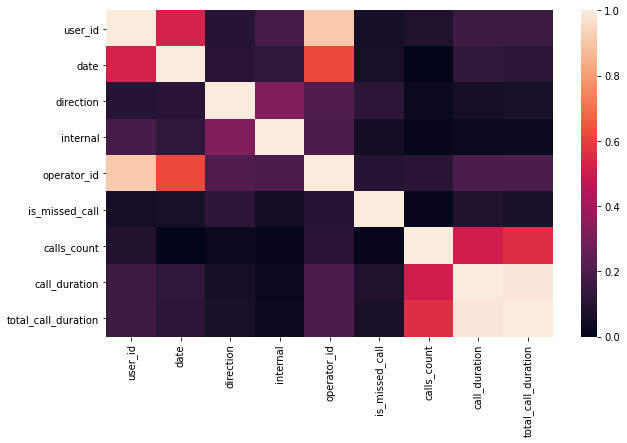

In [15]:
# строим хитмэп

plt.figure(figsize=(10,6))
sns.heatmap(phik_overview)

<div class="alert alert-warning">
    
**Комментарий ревьюера**

**#можно лучше**

А какие переменные должны по твоему коррелировать в нашем наборе? 

Смотреть все со всем очень не информативно. Лучше выбирать конкретные пары, тройки переменнфх и смотреть их отдельно

</div>

<div class="alert alert-info">

<b>Студент: </b> Вера, если честно, надеялся на эффект "серебряной пули" — само сработает :) Не сработало)))

</div>

In [16]:
# то же самое для данных, в которых пропуски в operator_id

phik_overview = t.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['user_id', 'operator_id', 'calls_count', 'call_duration', 'total_call_duration']


,user_id,date,direction,internal,is_missed_call,calls_count,call_duration,total_call_duration
user_id,1.00,0.49,0.22,0.12,0.41,0.21,0.26,0.18
date,0.49,1.00,0.00,0.04,0.00,0.00,0.00,0.00
direction,0.22,0.00,1.00,0.19,0.45,0.00,0.30,0.23
internal,0.12,0.04,0.19,1.00,0.06,0.00,0.00,0.00
is_missed_call,0.41,0.00,0.45,0.06,1.00,0.00,0.78,0.65
calls_count,0.21,0.00,0.00,0.00,0.00,1.00,0.00,0.49
call_duration,0.26,0.00,0.30,0.00,0.78,0.00,1.00,0.91
total_call_duration,0.18,0.00,0.23,0.00,0.65,0.49,0.91,1.00


<AxesSubplot:>

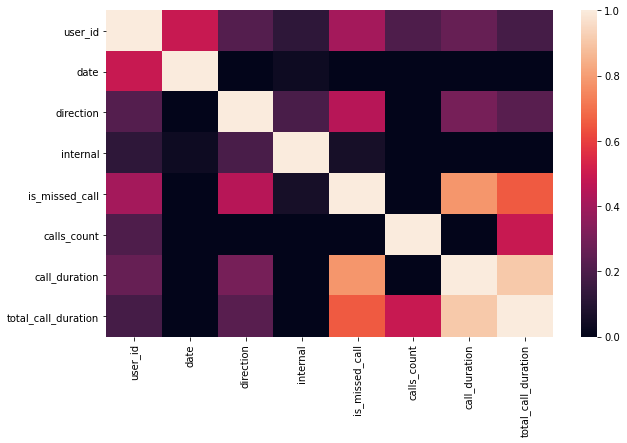

In [17]:
# такой же хитмэп

plt.figure(figsize=(10,6))
sns.heatmap(phik_overview)

Какой-то принципиальной разницы не вижу, разве что ожидаемо пропала связь `operator/user`. Выделить что-то особенное в данных с пропусками в `operator_id`не могу. Удалить такое большое количество пропусков тоже нельзя. Попробуем дальше поискать, что общего в строках с пропусками в `operator_id`.

In [18]:
# выведем эти строки в отдельнуюю таблицу operator_miss

operator_miss = df[pd.isna(df['operator_id'])].copy()
operator_miss.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
7,166377,2019-08-05 00:00:00+03:00,in,False,NaN,True,6,0,35
9,166377,2019-08-06 00:00:00+03:00,in,False,NaN,True,4,0,62
17,166377,2019-08-07 00:00:00+03:00,in,False,NaN,True,2,0,24
27,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34


Посмотрим на распределение в этой таблице

In [19]:
for col in operator_miss[['direction', 'internal', 'is_missed_call']]:
  display(str(col))
  display(operator_miss[col].value_counts())
  print()

'direction'

in     7917
out     198
Name: direction, dtype: int64

'internal'

False    7760
True      355
Name: internal, dtype: int64

'is_missed_call'

True     7993
False     122
Name: is_missed_call, dtype: int64

Подавляющее большинство строк с пропусками в `operatot_id` это входящие +  внешние + пропущенные вызовы.

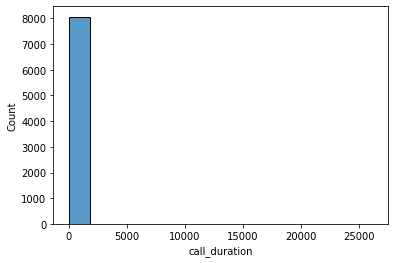

In [20]:
# посмотрим на длину этих звонков

sns.histplot(operator_miss['call_duration']);

<div class="alert alert-warning">
    
**Комментарий ревьюера - 2**

**#можно лучше**

Такая гистограмма не очень информативна, стоило поднастроить количество корзин

</div>

In [21]:
# картина начинает проясняться, посмотрим, сколько звонков с длительностью 0 минут

len(operator_miss[operator_miss['call_duration'] == 0])

7993

In [22]:
# всего строк с пропусками в operator_id

len(operator_miss)

8115

In [23]:
# сколько записей с ненулевым значением в call_duration

operator_miss[operator_miss['call_duration'] != 0]

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
698,166399,2019-08-12 00:00:00+03:00,in,False,NaN,False,1,10,55
704,166399,2019-09-02 00:00:00+03:00,in,False,NaN,False,1,68,115
4089,166503,2019-09-26 00:00:00+03:00,out,False,NaN,False,1,213,220
4136,166503,2019-10-09 00:00:00+03:00,in,False,NaN,False,1,374,405
4198,166503,2019-10-21 00:00:00+03:00,out,True,NaN,False,2,382,397
...,...,...,...,...,...,...,...,...,...
50930,168252,2019-11-28 00:00:00+03:00,in,True,NaN,False,2,265,274
50946,168252,2019-11-28 00:00:00+03:00,in,False,NaN,False,45,23765,23897
50955,168252,2019-11-28 00:00:00+03:00,out,False,NaN,False,22,11904,12211
50956,168252,2019-11-28 00:00:00+03:00,out,True,NaN,False,1,159,168


Не могу найти закономерностей или возможностей востановить данные в пропущенных значениях. Это не непрерывная переменная, заменить медианой, средним или даже модой не получится.

Удалить такой объем нельзя. Вместо пропусков поставлю маркер -1000, чтобы отметить эти данные. Это в дальнейшем позволит нам лучше кластеризовать call-центры (КЦ).

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Верное решение

</div>

<div class="alert alert-info">

<b>Студент: </b> Спасибо!
</div>

In [24]:
df.fillna(-1000, inplace=True)
df.isna().sum()

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64

In [25]:
df_len = len(df)
df_len

53785

In [26]:
# посмотрим, сколько данных потеряли в ходе очистки

print(f'Потеряли {df_len_start - df_len} строк, что составляет \
{(df_len_start - df_len)/ df_len_start:.2%} данных')

Потеряли 117 строк, что составляет 0.22% данных


Пропусков в `df` нет, идем дальше

In [27]:
# убедимся еще раз в отсутствии пропусков во второй таблице

telecom_clients.isna().sum()

user_id        0
tariff_plan    0
date_start     0
dtype: int64

### Выводы по обработке пропусков

В основной таблице с операторами и вызовами удалили 0.2% строк с пропусками в _iternal_. 

Во второй таблице данные без пропусков.

### Исследование соответствия типов

In [28]:
# смотрим типы данных в основной таблице

df.dtypes

user_id                  int64
date                    object
direction               object
internal                  bool
operator_id            float64
is_missed_call            bool
calls_count              int64
call_duration            int64
total_call_duration      int64
dtype: object

Неправильный формат у `date` и `operator_id`. Для первого нужен формат даты/времени, для второго формат целых чисел

In [29]:
# начнем с простого, переведем operator_id в int

df['operator_id'] = df['operator_id'].astype('int')

In [30]:
# займемся датой

df['date'].head()

0    2019-08-04 00:00:00+03:00
1    2019-08-05 00:00:00+03:00
2    2019-08-05 00:00:00+03:00
3    2019-08-05 00:00:00+03:00
4    2019-08-05 00:00:00+03:00
Name: date, dtype: object

In [31]:
# переводим в datetime

df['date'] = pd.to_datetime(df['date'])
df['date'].head()

0   2019-08-04 00:00:00+03:00
1   2019-08-05 00:00:00+03:00
2   2019-08-05 00:00:00+03:00
3   2019-08-05 00:00:00+03:00
4   2019-08-05 00:00:00+03:00
Name: date, dtype: datetime64[ns, pytz.FixedOffset(180)]

Данные идут в формате с тайм-зоной. Сначала извлечем дату

In [32]:
df['date'] = df['date'].dt.date

In [33]:
# вернем обратно тип datetime

df['date'] = pd.to_datetime(df['date'])

In [34]:
# проверяем 

df.dtypes

user_id                         int64
date                   datetime64[ns]
direction                      object
internal                         bool
operator_id                     int64
is_missed_call                   bool
calls_count                     int64
call_duration                   int64
total_call_duration             int64
dtype: object

In [35]:
# вторая таблица

telecom_clients.dtypes

user_id         int64
tariff_plan    object
date_start     object
dtype: object

In [36]:
# та же проблема с датами в date_start

telecom_clients['date_start'].head()

0    2019-08-15
1    2019-08-23
2    2019-10-29
3    2019-09-01
4    2019-10-16
Name: date_start, dtype: object

In [37]:
# переводим в формат даты

telecom_clients['date_start'] = pd.to_datetime(telecom_clients['date_start'])
telecom_clients['date_start'].head()

0   2019-08-15
1   2019-08-23
2   2019-10-29
3   2019-09-01
4   2019-10-16
Name: date_start, dtype: datetime64[ns]

В обеих таблицах данные в правильных форматах

### Удаление явных дубликатов

In [38]:
# ищем дубликаты в основной таблице

df.duplicated().sum()

4893

In [39]:
# смотрим на все дублирующиеся строчки

df_duplicated = df[df.duplicated(keep=False)]
df_duplicated

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
6,166377,2019-08-05,out,False,880020,True,8,0,50
8,166377,2019-08-05,out,False,880020,True,8,0,50
27,166377,2019-08-12,in,False,-1000,True,2,0,34
28,166377,2019-08-12,in,False,-1000,True,2,0,34
38,166377,2019-08-14,in,False,-1000,True,1,0,3
...,...,...,...,...,...,...,...,...,...
53875,168601,2019-11-26,in,False,-1000,True,3,0,35
53883,168603,2019-11-20,out,False,959118,True,3,0,89
53885,168603,2019-11-20,out,False,959118,True,3,0,89
53899,168606,2019-11-15,out,True,957922,False,4,3130,3190


In [40]:
# посмотрим распределение категориальных переменных в таблице с дубликатами

for col in df_duplicated[['direction', 'internal', 'is_missed_call']]:
  print(str(col))
  display(df_duplicated[col].value_counts())
  print()

direction


out    5836
in     3950
Name: direction, dtype: int64


internal


False    8764
True     1022
Name: internal, dtype: int64


is_missed_call


False    5560
True     4226
Name: is_missed_call, dtype: int64

Каких-то закономерностей не вижу, принимаю решение удалить дублирующие строки

In [41]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [42]:
df_len = len(df)

display(f'Потеряли {df_len_start - df_len} строк, что составляет \
{(df_len_start - df_len)/ df_len_start:.2%} данных')
print()
display(f'Длина готового для исследования датасета {df_len} строк')

'Потеряли 5010 строк, что составляет 9.29% данных'

'Длина готового для исследования датасета 48892 строк'

### Вывод по предобработке данных

Удалили 5010 строк с пропусками и дубликатами. Удаленные данные составляют 9.29% от изначального объема.

Длина готового для исследования датасета 48892 строк

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Хорошо, данные верно предобработаны
</div>

## EDA

Смотреть параметры мы будем в разрезе не отдельного аккаунта (`user_id`) или (`operator_id`), а в разрезе категории call-центра. 

План EDA следующий:

1. Беглый просмотр столбцов с непрерывными переменными, удаление аномалий
2. Добавление новых столбцов:
  - длина ожидания
3. Разделение датафрейма на отдельные таблицы по принципу причастности к категории call-центра
4. Анализ внутри категорийных таблиц

#### Анализ аномалий

In [43]:
# смотрим основные статистические параметры, 
# столбцы с Id исключаем

df.drop(columns=['user_id','operator_id']).describe().T

,count,mean,std,min,25%,50%,75%,max
calls_count,48892.0,16.495214,63.671633,1.0,1.0,4.0,12.0,4817.0
call_duration,48892.0,868.088788,3779.549967,0.0,0.0,37.0,573.0,144395.0
total_call_duration,48892.0,1158.976458,4456.180933,0.0,46.0,210.0,902.0,166155.0


Во всех столбцах с непрерывными категориями медиана значительно меньше среднего. Это говорит о "жирном хвосте" распределения. Построим ящики с усами для этих трех столбцов

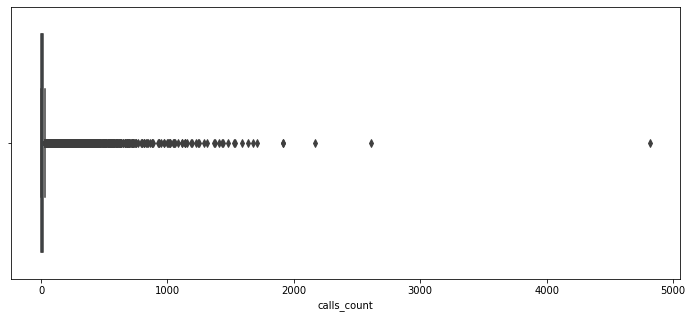

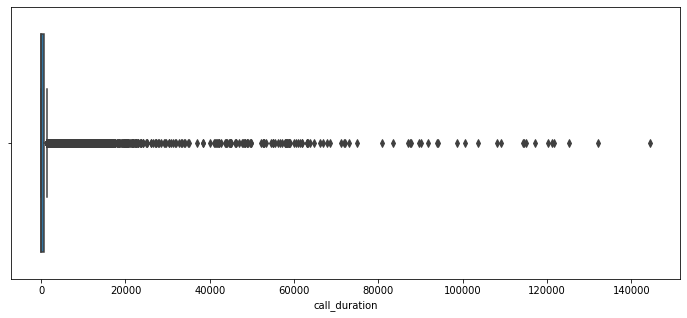

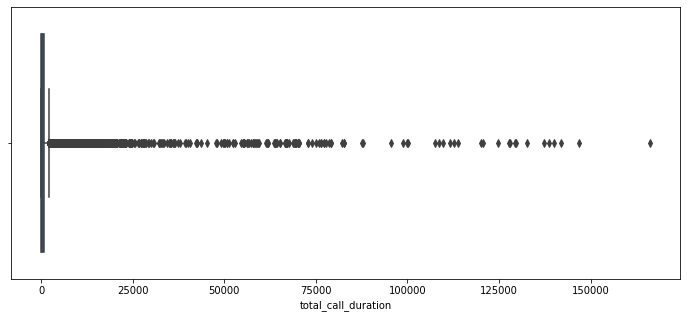

In [44]:
for col in df[['calls_count', 'call_duration', 'total_call_duration']]:
  plt.figure(figsize=(12,5))
  ax = sns.boxplot(x=df[col])
  plt.show()

Видно, что аномально больших значений много во всех трех столбцах. Посмотрим на 90, 95 и 99 пецентили для этих столбцов

In [45]:
for col in df[['calls_count', 'call_duration', 'total_call_duration']]:
  print(str(col))
  display(df[col].quantile([.9,.95,.99]))
  display(df[col].agg(['max']))
  print()

calls_count


0.90     35.00
0.95     62.00
0.99    165.09
Name: calls_count, dtype: float64

max    4817
Name: calls_count, dtype: int64


call_duration


0.90     2096.90
0.95     3730.45
0.99    10324.90
Name: call_duration, dtype: float64

max    144395
Name: call_duration, dtype: int64


total_call_duration


0.90     2614.00
0.95     4538.35
0.99    12969.99
Name: total_call_duration, dtype: float64

max    166155
Name: total_call_duration, dtype: int64

По боксплотам и цифровым значениям видим, что даже 99 перцентиль меньше max значение. Чтобы слишком большие значения не искажали картину, удалим данные по 99 перцентилю. 

Циклом это сделать не получится, потому что при удалении по 99-му перцентилю по одному столбцу изменится 99-й перцентиль другого столбца, а значит при фильтрации мы потеряем больше данных.

Поэтому придется хардкодить и брать значения 99-х квантилей руками из кода выше.

In [46]:
q_99_calls_count = df['calls_count'].quantile(.99)
q_99_call_duration = df['call_duration'].quantile(.99)
q_99_total_call_duration = df['total_call_duration'].quantile(.99)

In [47]:
df = df[df['calls_count'] < q_99_calls_count]
df = df[df['call_duration'] < q_99_call_duration]
df = df[df['total_call_duration'] < q_99_total_call_duration]

df_len = len(df)

display(f'Потеряли {df_len_start - df_len} строк, что составляет \
{(df_len_start - df_len)/ df_len_start:.2%} данных')
print()
display(f'Длина готового для исследования датасета {df_len} строк')

'Потеряли 5789 строк, что составляет 10.74% данных'

'Длина готового для исследования датасета 48113 строк'

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Вводить числа вручную - это ошибка. Используй непосредственный расчет или переменные. Иначе при небольших изменениях в предобработке придется искать и менять все руками или все поплывет

</div>

<div class="alert alert-info">

<b>Студент: </b> Поправил.

</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

👍

</div>

#### Вывод по обработке аномалий

Очистили данные от слишком больших значений, удалив выбросы больше 99-го квантиля по трем столбцам с непрерывными данными `['calls_count', 'call_duration', 'total_call_duration']`.

Данные теперь чище и меньше искажены слишком большими значениями.

#### Добавление столбца со временем ожидания

In [48]:
# добавим столбец wait_time, просто посчитав разницу total_call_duration и call_duration

df['wait_time'] = df['total_call_duration'] - df['call_duration']
df.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time
0,166377,2019-08-04,in,False,-1000,True,2,0,4,4
1,166377,2019-08-05,out,True,880022,True,3,0,5,5
2,166377,2019-08-05,out,True,880020,True,1,0,1,1
3,166377,2019-08-05,out,True,880020,False,1,10,18,8
4,166377,2019-08-05,out,False,880022,True,3,0,25,25


<div class="alert alert-warning">
    
**Комментарий ревьюера**

**#можно лучше**

Кажется нам было бы интересно время ожидания одного звонка, а не сумма за день
</div>

<div class="alert alert-info">

<b>Студент: </b> Добавил далее в проекте!

</div>

#### Категоризация call-центров на обзванивающие и принимающие

In [49]:
# разобьем категориальный столбец direction на два бинарных direction_in и direction_out

df = pd.get_dummies(df, columns=['direction'])

In [50]:
# смотрим на таблицу с новыми столбцами

df.head()

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,direction_in,direction_out
0,166377,2019-08-04,False,-1000,True,2,0,4,4,1,0
1,166377,2019-08-05,True,880022,True,3,0,5,5,0,1
2,166377,2019-08-05,True,880020,True,1,0,1,1,0,1
3,166377,2019-08-05,True,880020,False,1,10,18,8,0,1
4,166377,2019-08-05,False,880022,True,3,0,25,25,0,1


In [51]:
# в каждой записи несколько звонков, это количество указано в calls_count
# поэтому умножаем значения в direction_in и direction_out на calls_count

df['direction_in'] = df['direction_in'] * df['calls_count']
df['direction_out'] = df['direction_out'] * df['calls_count']

# смотрим на обновленные данные

df.head()

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,direction_in,direction_out
0,166377,2019-08-04,False,-1000,True,2,0,4,4,2,0
1,166377,2019-08-05,True,880022,True,3,0,5,5,0,3
2,166377,2019-08-05,True,880020,True,1,0,1,1,0,1
3,166377,2019-08-05,True,880020,False,1,10,18,8,0,1
4,166377,2019-08-05,False,880022,True,3,0,25,25,0,3


In [52]:
# группируем данные по КЦ (user_id) и считаем сумму в каждом новом столбце

t = df.groupby('user_id')[['direction_in', 'direction_out']].sum()
t.head()

,direction_in,direction_out
user_id,,
166377,196,4953
166391,26,1
166392,209,0
166399,24,0
166405,5284,9564


Разделим КЦ на три категории:
- совершающие в основном исходящие вызовы, далее для удобства назовем такие центры просто "исходящие"
- в основном принимающие вызовы, назовем такие центры "входящие"
- центры промежуточного типа, где пропорция исходящие/входящие колеблется в дипазоне 0.85 - 1.15 (по 15% в каждую сторону)

Напишем функцию, которая принмает на вход два столбца direction_in и direction_out, а отдает одну из категорий колл-центра.

In [53]:
def direction_class(row):
  if row['direction_in'] == 0:
    return 'out'
  elif row['direction_out'] == 0:
    return 'in'
  elif 0.85 <= (row['direction_in'] / row['direction_out']) <= 1.15:
    return 'mid'
  elif 0.85 <= (row['direction_out'] / row['direction_in']) <= 1.15:
    return 'mid'
  elif row['direction_in'] > row['direction_out']:
    return 'in'
  else:
    return 'out'

In [54]:
# применяем новую функцию к таблице

t['user_type'] = t.apply(direction_class, axis=1)
t.reset_index(inplace=True)

In [55]:
# выводим таблицу с новым столбцом

t.head()

,user_id,direction_in,direction_out,user_type
0,166377,196,4953,out
1,166391,26,1,in
2,166392,209,0,in
3,166399,24,0,in
4,166405,5284,9564,out


In [56]:
# выведем строки с промежуточными колл-центрами

t.query('user_type == "mid"').head(10)

,user_id,direction_in,direction_out,user_type
22,166582,7471,6462,mid
50,166774,58,54,mid
129,167235,900,963,mid
155,167466,2174,2149,mid
184,167654,2800,2656,mid
199,167799,1044,1183,mid
200,167805,16,16,mid
204,167828,1061,1171,mid
269,168225,27,29,mid
274,168271,1353,1233,mid


Очень похоже на правду, количество исходящих и входящих не сильно отличается

In [57]:
# посмотрим на распределение входящих, исходящих
# и промежуточных колл-центров

t['user_type'].value_counts()

in     167
out    129
mid     11
Name: user_type, dtype: int64

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Разделение верно проведено

</div>

У нас есть таблица, в которой у каждого `user_id` есть своя категория. Присоединяем таблицу t к основной таблице df

In [58]:
df = df.merge(t[['user_id','user_type']], how='left', on='user_id')
df.head()

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,direction_in,direction_out,user_type
0,166377,2019-08-04,False,-1000,True,2,0,4,4,2,0,out
1,166377,2019-08-05,True,880022,True,3,0,5,5,0,3,out
2,166377,2019-08-05,True,880020,True,1,0,1,1,0,1,out
3,166377,2019-08-05,True,880020,False,1,10,18,8,0,1,out
4,166377,2019-08-05,False,880022,True,3,0,25,25,0,3,out


In [59]:
# посмотрим, сколько строк каждого типа колл-центров в таблице

df['user_type'].value_counts()

out    34969
in     11022
mid     2122
Name: user_type, dtype: int64

Грубо оценим ошибку категоризации. Отфильтруем строки, в которых direction_in > 0 и user_type == "out".

In [60]:
df.query('(direction_in > 0) and (user_type == "out")').head()

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,direction_in,direction_out,user_type
0,166377,2019-08-04,False,-1000,True,2,0,4,4,2,0,out
7,166377,2019-08-05,False,-1000,True,6,0,35,35,6,0,out
8,166377,2019-08-06,False,-1000,True,4,0,62,62,4,0,out
16,166377,2019-08-07,False,-1000,True,2,0,24,24,2,0,out
25,166377,2019-08-12,False,880028,False,1,407,411,4,1,0,out


In [61]:
# запишем длину этой выборки в len_t

len_t = len(df.query('(direction_in > 0) and (user_type == "out")'))

In [62]:
print(f'Доля записей со значениями в direction_in и типом out {len_t / len(df):.2%}')

Доля записей со значениями в direction_in и типом out 22.12%


22% записей при с категории call-центра `out` имеет входящие звонки, слишком много. Добавятся ошибки и при обратной фильтрации - при категории `in` и исходящих звонках, процент ошибки станет еще больше. 

Это говорит о неточности допусков для промежуточных call-центров по 15% в каждую сторону. Мы можем продолжить и с такими цифрами, в среднем по нашей модели, несмотря на исключения, в колл-центрах бОльшая часть звонков будет соответствовать типу call-центра.

Но хочется большей точности. Поэтому увеличим интервал до 40% в каждую сторону от единицы (когда `direction_in == direction_out`) и пересчитаем все цифры.

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Если колл-центр специализируется на обзвоне, то это не значит, что у него не должно быть входящих и наоборот.

</div>

In [63]:
# меняем параметры в функции, диапазон ставим 0.6/1.4

def direction_class(row):
  if row['direction_in'] == 0:
    return 'out'
  elif row['direction_out'] == 0:
    return 'in'
  elif 0.6 <= (row['direction_in'] / row['direction_out']) <= 1.4:
    return 'mid'
  elif 0.6 <= (row['direction_out'] / row['direction_in']) <= 1.4:
    return 'mid'
  elif row['direction_in'] > row['direction_out']:
    return 'in'
  else:
    return 'out'

In [64]:
# убираем из df user_type

df = df.drop('user_type', axis=1)

# заново собираем временную таблицу t

t = df.groupby('user_id')[['direction_in', 'direction_out']].sum()

# проходим обновленной функцией direction_class по t['user_type']

t['user_type'] = t.apply(direction_class, axis=1)
t.reset_index(inplace=True)
t.head()

,user_id,direction_in,direction_out,user_type
0,166377,196,4953,out
1,166391,26,1,in
2,166392,209,0,in
3,166399,24,0,in
4,166405,5284,9564,out


In [65]:
# посмотрим на новое распределение по категории колл-центра

t['user_type'].value_counts()

in     153
out    113
mid     41
Name: user_type, dtype: int64

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Хорошо, это тоже вариант

</div>

Промежуточных колл-центров стало больше. Присоеденим таблицу с категориями к основной и посмотрим на результат.

In [66]:
df = df.merge(t[['user_id','user_type']], how='left', on='user_id')
df.head()

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,direction_in,direction_out,user_type
0,166377,2019-08-04,False,-1000,True,2,0,4,4,2,0,out
1,166377,2019-08-05,True,880022,True,3,0,5,5,0,3,out
2,166377,2019-08-05,True,880020,True,1,0,1,1,0,1,out
3,166377,2019-08-05,True,880020,False,1,10,18,8,0,1,out
4,166377,2019-08-05,False,880022,True,3,0,25,25,0,3,out


In [67]:
# еще раз проведем грубую оценку ошибки

len(df.query('(direction_in > 0) and (user_type == "out")'))

8793

In [68]:
# запишем эту цифру в len_t2

len_t2 = len(df.query('(direction_in > 0) and (user_type == "out")'))

# и сравним с результатами категоризации с допусками 5%

print(f'Точность улучшилась в {len_t / len_t2:.2f} раз')

Точность улучшилась в 1.21 раз


В 1,2 раза лучше

In [69]:
# несоответствий всего

wrong_rows = (len(df.query('(direction_in > 0) and (user_type == "out")')) +
              len(df.query('(direction_out > 0) and (user_type == "in")'))
)

In [70]:
display(f'Всего {wrong_rows} спорных записей')
display(f'Это составляет {wrong_rows/len(df):.2%} от общего количества записей')

'Всего 10463 спорных записей'

'Это составляет 21.75% от общего количества записей'

Остаемся с этой моделью, дальше расширять "окно" миддловых колл-центров не будем. 

При расширении диапазона точность увеличится, но вместе с ней увеличится доля промежуточных центров, а у нас четкое указание в ТЗ не делать много таких call-центров.

#### Вывод по категоризации call-центров

Разделили call-центры на три категории:
1. Совершающие в основном исходящие звонки. Таких 113
2. В основном принимающих звонки — 153 call-центров
3. Промежуточный тип, в котором количество исходящих и входящих трафиков близко. "Мидловых" call-центров 41 штука.

Далее разделим исходный датафрейм на три отдельных по категориям и продолжим исследование.

#### Разделение таблицы на датафреймы по категории

In [71]:
df['user_type'].unique()

array(['out', 'in', 'mid'], dtype=object)

In [72]:
df_in = df.query('user_type == "in"')
df_out = df.query('user_type == "out"')
df_mid = df.query('user_type == "mid"')

display('Проверка')
display(f'Длина исходного датафрейма {len(df)} строк')
display(f'Сумма длин трех DF равна {(len(df_in)+len(df_out)+len(df_mid))}')

if len(df) == (len(df_in)+len(df_out)+len(df_mid)):
  display ('Все верно')

'Проверка'

'Длина исходного датафрейма 48113 строк'

'Сумма длин трех DF равна 48113'

'Все верно'

#### Вывод по категоризации

Разделили таблицу на три отдельных датафрейма по категории call-центра. Далее работаем с каждой таблицей отдельно и выводим закономерности для каждого типа call-центра.

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Ок, данные готовы для анализа
</div>

## Поиск ответов на вопросы заказчика

### Работа с call-центрами, принимающими звонки

In [73]:
df_in.head()

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,direction_in,direction_out,user_type
519,166391,2019-08-06,False,882476,False,1,175,186,11,1,0,in
520,166391,2019-08-06,True,-1000,True,3,0,163,163,3,0,in
521,166391,2019-08-07,True,882478,False,2,11,74,63,2,0,in
522,166391,2019-08-07,False,882478,False,1,57,70,13,1,0,in
523,166391,2019-08-07,True,882478,True,1,0,7,7,0,1,in


По ТЗ есть две целевых переменных:

1. много пропущенных входящих вызовов,
2. долгое ожидания ответа при входящих внешних вызовах

In [74]:
# добавим столбец с количеством пропущенных звонков, 
# просто умножим is_missed_call на calls_count
# в случае False в miss_count будет ноль

df_in['miss_count'] = df_in['is_missed_call'] * df_in['calls_count']

# сразу посмотрим на статистические цифры по новому столбцу

df_in['miss_count'].describe()

count    8184.000000
mean        2.273949
std         7.727532
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       143.000000
Name: miss_count, dtype: float64

Медиана ноль, 75 квартиль тоже ноль

0      4565
1      1651
2       639
3       336
4       196
       ... 
92        1
96        1
108       1
53        1
143       1
Name: miss_count, Length: 79, dtype: int64

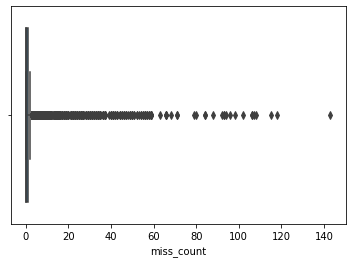

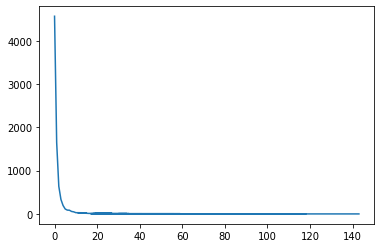

In [75]:
# посмотрим, какие значения есть в столбце

display(df_in['miss_count'].value_counts())

# сразу строим простые графики

sns.boxplot(df_in['miss_count'])
plt.show()

df_in['miss_count'].value_counts().plot()
plt.show()

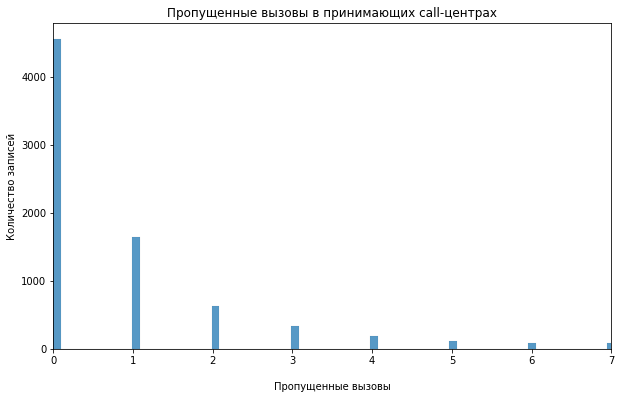

In [76]:
# наглядно, что основная масса пропущенных == 0

plt.figure(figsize=(10,6))
sns.histplot(data=df_in, x="miss_count")
plt.xlim([0, 7])
plt.xlabel("\nПропущенные вызовы")
plt.ylabel("Количество записей")
plt.title("Пропущенные вызовы в принимающих call-центрах")
plt.show()

In [77]:
# посмотрим на долю операторов, допускающих более 1 пропущенного вызова

len_miss_opers = df_in.query('miss_count > 1')['operator_id'].nunique()
miss_opers = df_in.query('miss_count > 1')['operator_id']\
                                     .nunique() / df_in['operator_id'].nunique()
print(f'{len_miss_opers} операторов допускают более 1 пропущенного вызова')
print(f'{miss_opers:.2%} операторов допускают более 1 пропущенного вызова')

91 операторов допускают более 1 пропущенного вызова
31.82% операторов допускают более 1 пропущенного вызова


Как видим, в основном операторы в принимающих call-центрах работают без пропущенных вызовов. Нормой является ответ, пусть и через какое-то время. Неприемлимо, чтобы в каком-то call-центре рано или поздно не взяли трубку. 

Но мы проявим понимание к работе операторов и сделаем скидку на то, что все могут когда-то ошибаться. Поэтому установим порог неэффективности более **одного** пропущенного вызова.

Посмотрим на столбец `wait_time` у неотвеченных вызовов.

In [78]:
# фильтруем по miss_count > 0 и смотрим ['min', 'max', 'median']

df_in.query('miss_count > 0')['wait_time'].agg(['min', 'max', 'median'])

min          0.0
max       6410.0
median      23.0
Name: wait_time, dtype: float64

Ожидаемо медиана довольно ощутима — 23 секунды. Т.е. вполне возможно, что человек позвонил и в итоге 23 секунды "провисел" на линии, так и не поговорив в итоге с оператором. 

Пропущенный вызов — неприемлимо для бизнеса. После того, как человеку не ответили, а он 20 секунд слушал дурацкую музыку и то, что "его звонок очень важен для нас", лояльность его к бизнесу точно не вырастет. Необходимо исключить такие явления. В качестве поправки на человечность мы допускаем, что человек может единожды ошибиться и пропустить вызов.

**Порог неэффективности — более одного пропущеннго вызова.**

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Возможная логика, хотя на самом деле и 1 звонок в день - это много. Скорее нужно сделать 0,25-0,3 звонка в день, т.е. 1 звонок в 3-4 дня
</div>

### Список неэффективных операторов в принимающих КЦ

Выведем записи с операторами, допустившими пропущенный вызов. 

Запишем данные в новый датафрейм `df_in_ne` (not effective — ne).

In [79]:
df_in_ne = df_in.query('miss_count > 1')
df_in_ne.head()

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,direction_in,direction_out,user_type,miss_count
520,166391,2019-08-06,True,-1000,True,3,0,163,163,3,0,in,3
524,166391,2019-08-07,False,-1000,True,2,0,71,71,2,0,in,2
528,166391,2019-08-15,True,-1000,True,2,0,77,77,2,0,in,2
529,166391,2019-08-16,True,-1000,True,3,0,67,67,3,0,in,3
541,166392,2019-08-12,False,-1000,True,3,0,7,7,3,0,in,3


In [80]:
# неэффективных операторов для КЦ, принимающих вызовы, запишем в список ne_operators_in

ne_operators_in = df_in_ne['operator_id'].unique().tolist()

# КЦ, в которых эти операторы работают — в список ne_users_in

ne_users_in = df_in_ne['user_id'].unique().tolist()

In [81]:
len(ne_users_in)

140

In [82]:
print(f'Всего {df_in_ne["operator_id"].nunique()} неэффективных операторов')
print(f'Что составляет {df_in_ne["operator_id"].nunique()/df_in["operator_id"].nunique():.2%}') 
print(f'Всего {df_in_ne["user_id"].nunique()} КЦ с неэффективными операторами') 
print(f'Что составляет {df_in_ne["user_id"].nunique()/df_in["user_id"].nunique():.2%}') 


Всего 91 неэффективных операторов
Что составляет 31.82%
Всего 140 КЦ с неэффективными операторами
Что составляет 91.50%


### Выводы по прупущенным вызовам

Стандарт качества для принимающих call-центров — отсутствие пропущенных вызовов, но мы сделали допущение, что один раз человек по какой-либо причине может ошибиться. Порог неэффективности — более 1 пропущенного вызова.

по нашим параметрам 91 оператор допускают более 1 пропущенного вызова, что составляет 31.82%.

Всего 140 КЦ с неэффективными операторами, что составляет 91.50% от общего количества принимающих КЦ.



### Время ожидания

In [83]:
df_in[:5]

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,direction_in,direction_out,user_type,miss_count
519,166391,2019-08-06,False,882476,False,1,175,186,11,1,0,in,0
520,166391,2019-08-06,True,-1000,True,3,0,163,163,3,0,in,3
521,166391,2019-08-07,True,882478,False,2,11,74,63,2,0,in,0
522,166391,2019-08-07,False,882478,False,1,57,70,13,1,0,in,0
523,166391,2019-08-07,True,882478,True,1,0,7,7,0,1,in,1


In [84]:
# добавим столбец со средним временем ожидания

df_in['wait_mean'] = df_in['wait_time'] / df_in['calls_count']

# сразу же статистические параметры

df_in['wait_mean'].describe()

count    8184.000000
mean       17.427249
std        15.448408
min         0.000000
25%         7.000000
50%        14.000000
75%        24.141667
max       294.000000
Name: wait_mean, dtype: float64

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Да, вот приходится делить, это можно было сразу сделать, суммарное время ожидания нам собственно не нужно

</div>

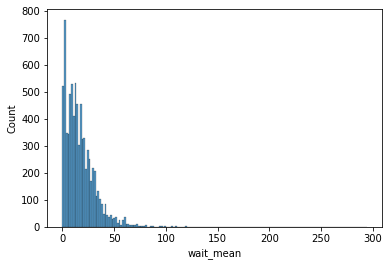

In [85]:
# простой график

sns.histplot(df_in['wait_mean'])
plt.show()

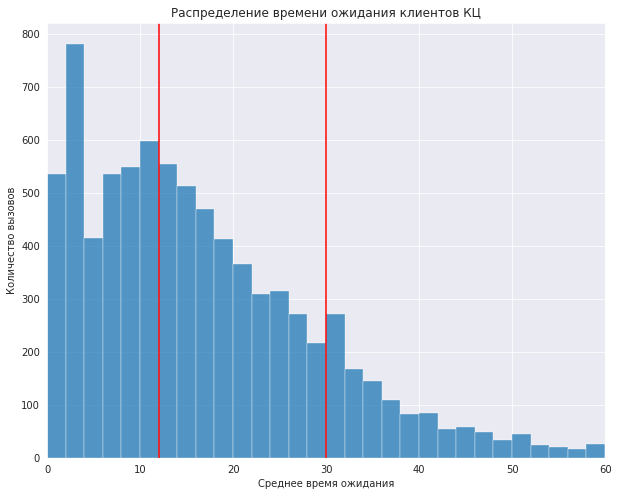

In [86]:
# все, что после 60 секунд, нам неинтересно, потому что долго и
# носит характер выбросов

sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
plt.title('Распределение времени ожидания клиентов КЦ')
sns.histplot(df_in['wait_mean'], binwidth=2)
plt.axvline(x=12,color='red')
plt.axvline(x=30,color='red')
plt.xlabel('Среднее время ожидания')
plt.ylabel('Количество вызовов')
plt.xlim([0,60])
plt.show()

Количество клиентов, готовых ждать, растет до времени ожидания == 12 секунд. Далее это количество уменшается вместе с терпением клиентов до 30 секунд. На 30 секундах количество разово возрастает и далее распределение сходит на нет, остаются лишь аномальные значения > 60.

Делаем вывод, что клиент готов терпеть до 30 секунд (в идеале до 12, но это очень маленький срок по жизненной логике). Желательно ответить в этот промежуток времени. Это и будет порогом эффективности — обработать звонок за 30 секунд.

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Не совсем поняла логику, поясни. Где ты видишь, что клиент готов ждать? Это оператор его заставляет. А сколько клиентов повесилдо трубку до 30 сек? Как это посмотреть? Клиенты, которые не готовы ждать не попали в твой график, а нужно смотреть именно их.
    
</div>

<div class="alert alert-info">

<b>Студент: </b> Вера, понял. Логика высосана из пальца, спорить не буду. Спасибо, дала наводку — нам нужны клиенты с ожиданием, но разговор с которыми так и не состоялся, правильно понял мысль?

</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Да, все верно

</div>

In [87]:
# фильтруем пользователей, которые не дозвонились, но 
# имеют время ожидания

wait_without_talk = df_in.query('call_duration == 0 and wait_time > 0')
wait_without_talk

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,direction_in,direction_out,user_type,miss_count,wait_mean
520,166391,2019-08-06,True,-1000,True,3,0,163,163,3,0,in,3,54.333333
523,166391,2019-08-07,True,882478,True,1,0,7,7,0,1,in,1,7.000000
524,166391,2019-08-07,False,-1000,True,2,0,71,71,2,0,in,2,35.500000
525,166391,2019-08-08,False,-1000,True,1,0,20,20,1,0,in,1,20.000000
526,166391,2019-08-09,False,-1000,True,1,0,33,33,1,0,in,1,33.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48014,168598,2019-11-14,False,-1000,True,3,0,33,33,3,0,in,3,11.000000
48015,168598,2019-11-17,False,-1000,True,3,0,46,46,3,0,in,3,15.333333
48016,168598,2019-11-18,False,-1000,True,9,0,112,112,9,0,in,9,12.444444
48017,168598,2019-11-19,False,-1000,True,8,0,79,79,8,0,in,8,9.875000


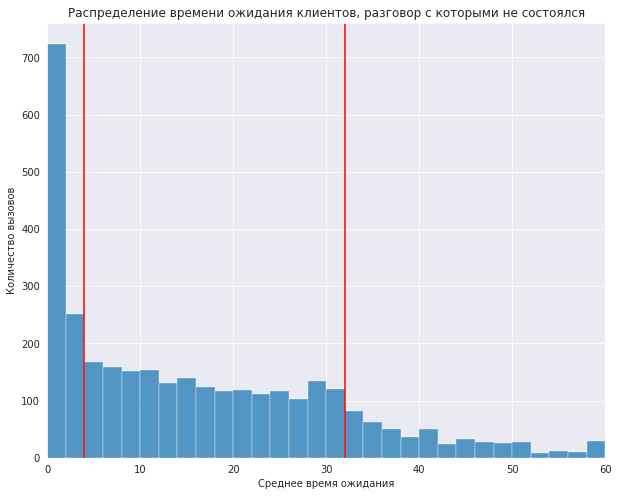

In [88]:
# строим график

sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
plt.title('Распределение времени ожидания клиентов, разговор с которыми не состоялся')
sns.histplot(wait_without_talk['wait_mean'], binwidth=2)
plt.axvline(x=4,color='red')
plt.axvline(x=32,color='red')
plt.xlabel('Среднее время ожидания')
plt.ylabel('Количество вызовов')
plt.xlim([0,60])
plt.show()

Сразу видно два порога — 4 секунды и меньший 32 секунды. Первый — люди совсем не хотят ждать и кладут трубку. Второй — 32 секунды, после этого времени количество вызовов падает, люди начинают класть трубку.

Значит допустимый порог — 32 секунды.

Фильтруем данные по порогу среднего времени ожидания.

<div class="alert alert-info">

<b>Студент: </b> Вера, спасибо!!! Реально голову ломал и придумывал то, чего нет.

</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

👍

</div>

In [89]:
df_wait_ne = df_in.query('wait_mean > 32')
display(df_wait_ne.head())
display(f'Всего {len(df_wait_ne)} таких записей')

display(f'Всего {df_wait_ne["operator_id"].nunique()} операторов, отвечающих более 32 секунд')
display(f'Что составляет {df_wait_ne["operator_id"].nunique()/df_in["operator_id"].nunique():.2%}') 

display(f'Всего {df_wait_ne["user_id"].nunique()} КЦ с такими операторами')
display(f'Что составляет {df_wait_ne["user_id"].nunique()/df_in["user_id"].nunique():.2%}') 



,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,direction_in,direction_out,user_type,miss_count,wait_mean
520,166391,2019-08-06,True,-1000,True,3,0,163,163,3,0,in,3,54.333333
524,166391,2019-08-07,False,-1000,True,2,0,71,71,2,0,in,2,35.500000
526,166391,2019-08-09,False,-1000,True,1,0,33,33,1,0,in,1,33.000000
527,166391,2019-08-10,True,-1000,True,1,0,38,38,1,0,in,1,38.000000
528,166391,2019-08-15,True,-1000,True,2,0,77,77,2,0,in,2,38.500000


'Всего 1030 таких записей'

'Всего 121 операторов, отвечающих более 32 секунд'

'Что составляет 42.31%'

'Всего 83 КЦ с такими операторами'

'Что составляет 54.25%'

In [90]:
# неэффективных операторов запишем в список ne_operators_wait

ne_operators_wait = df_wait_ne['operator_id'].unique().tolist()

# клиентов, у которых эти операторы работают — в список ne_users_wait

ne_users_wait = df_wait_ne['user_id'].unique().tolist()

In [91]:
# насколько "перекрываются" неэффективные операторы из списка долгого ожидания и
# операторы из списка прпоущенных вызовов

print(f'{len(np.intersect1d(ne_operators_in, ne_operators_wait))} операторов попадают в оба списка')

59 операторов попадают в оба списка


### Вывод по неэффективным операторам КЦ, принимающих звонки:

Для оценки неэффективности принмающих звонки КЦ использовали две метрики:
1. Количество пропущенных вызовов
2. Время ожидания клиентом оператора

Для пропущенных вызовов выбран порог более одного пропущенного звонка.

Для ожидания вызова установлена верхняя граница в 30 секунд, ожидание выше считаем признаокм неэффективной работы.

В наших данных для КЦ, в основном принимающих звонки:

- Всего 91 неэффективных операторов
- Что составляет 31.82%
- Всего 140 КЦ с неэффективными операторами
- Что составляет 91.50%

ID операторов сохранены в списке `ne_operators_in`.

ID КЦ с такими операторами в списке `ne_users_in`.

Данные по операторам, заставляющих клиентов ждать чуть больше:

- Всего 130 операторов, отвечающих более 30 секунд
- Что составляет 45.45%
- Всего 94 КЦ с такими операторами
- Что составляет 61.44%

62 операторов попадают в оба списка неэффективности для принимающих КЦ.

ID операторов сохранены в списке `ne_operators_wait`.

ID КЦ с такими операторами в списке `ne_users_wait`.

### Работа с КЦ, обзванивающих клиентов

In [92]:
# фильтруем данные по типу КЦ и записываем обзванивающие КЦ в таблицу df_out

df_out = df.query('user_type == "out"').copy()

df_out.head()

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,direction_in,direction_out,user_type
0,166377,2019-08-04,False,-1000,True,2,0,4,4,2,0,out
1,166377,2019-08-05,True,880022,True,3,0,5,5,0,3,out
2,166377,2019-08-05,True,880020,True,1,0,1,1,0,1,out
3,166377,2019-08-05,True,880020,False,1,10,18,8,0,1,out
4,166377,2019-08-05,False,880022,True,3,0,25,25,0,3,out


In [93]:
display(f'Всего {df_out["operator_id"].nunique()} операторов в обзванивающих КЦ')
print()
display(f'Всего {df_out["user_id"].nunique()} обзванивающих КЦ')

'Всего 654 операторов в обзванивающих КЦ'

'Всего 113 обзванивающих КЦ'

Для обзванивающих КЦ задан один контрольный параметр — количество исходящих вызовов

In [94]:
# группируем данные по дню и оператору, считаем количество исходящих
# звонков по каждому оператору за день

operators_group = df_out.groupby(['operator_id','date'])\
          [['direction_out', 'total_call_duration', 'direction_in']].agg(['sum'])
operators_group

direction_out total_call_duration direction_in
                                 sum                 sum          sum
operator_id date                                                     
-1000       2019-08-02             0                   4            1
            2019-08-03             0                  16            2
            2019-08-04             0                   4            2
            2019-08-05             0                  49            7
            2019-08-06             0                 171           40
...                              ...                 ...          ...
 972412     2019-11-27            26                2137            1
            2019-11-28            34                2411            0
 972460     2019-11-27            11                 291            1
            2019-11-28            39                1547            0
 973120     2019-11-27             3                  25            0

[12465 rows x 3 columns]

In [95]:
# убираем мульти-индекс

operators_group.columns = operators_group.columns.get_level_values(0)

In [96]:
operators_group

direction_out  total_call_duration  direction_in
operator_id date                                                        
-1000       2019-08-02              0                    4             1
            2019-08-03              0                   16             2
            2019-08-04              0                    4             2
            2019-08-05              0                   49             7
            2019-08-06              0                  171            40
...                               ...                  ...           ...
 972412     2019-11-27             26                 2137             1
            2019-11-28             34                 2411             0
 972460     2019-11-27             11                  291             1
            2019-11-28             39                 1547             0
 973120     2019-11-27              3                   25             0

[12465 rows x 3 columns]

In [97]:
# считаем среднюю продолжительность разговора у оператора за день,
# в знаменатель добавляем исходящие и входящие вызовы

operators_group['mean_duration'] = operators_group['total_call_duration']/\
            (operators_group['direction_out'] + operators_group['direction_in'])

In [98]:
operators_group

direction_out  total_call_duration  direction_in  \
operator_id date                                                           
-1000       2019-08-02              0                    4             1   
            2019-08-03              0                   16             2   
            2019-08-04              0                    4             2   
            2019-08-05              0                   49             7   
            2019-08-06              0                  171            40   
...                               ...                  ...           ...   
 972412     2019-11-27             26                 2137             1   
            2019-11-28             34                 2411             0   
 972460     2019-11-27             11                  291             1   
            2019-11-28             39                 1547             0   
 973120     2019-11-27              3                   25             0   

                        mean_duration  
operator_id date                       
-1000       2019-08-02       4.000000  
            2019-08-03       8.000000  
            2019-08-04       2.000000  
            2019-08-05       7.000000  
            2019-08-06       4.275000  
...                               ...  
 972412     2019-11-27      79.148148  
            2019-11-28      70.911765  
 972460     2019-11-27      24.250000  
            2019-11-28      39.666667  
 973120     2019-11-27       8.333333  

[12465 rows x 4 columns]

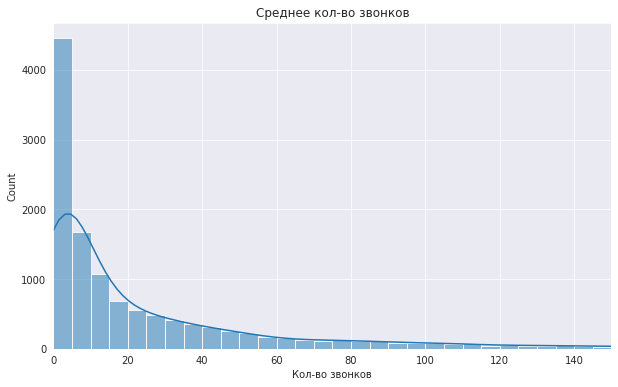

In [99]:
# построим график распределения среднего кол-ва исходящих звонков
plt.figure(figsize=(10,6))
#plt.axvline(x=15,color='red')
sns.histplot(operators_group['direction_out'], binwidth=5,kde=True)
plt.xlim([0,150])
plt.title('Среднее кол-во звонков')
plt.xlabel('Кол-во звонков')
plt.show()
# sns.histplot(data=t, x="out_calls_mean",binwidth=2,kde=True)

По этому распределению порог неэффективности неочевиден

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

А как должен выглядеть порог неэффективности по расперделению?

</div>

<div class="alert alert-info">

<b>Студент: </b> Ну какой-то резкий скачок, здесь я ничего не увидел, кроме кучи нолей. Поэтому график никакой информации не несет, к сожалению.
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Да, а значит его можно не делать. Не стоит в реальных проектах строить графики ради графиков. Если ты по графику не можешь написать 3-5 предложений каких-то существенных замечаний, то делать график не стоит

</div>

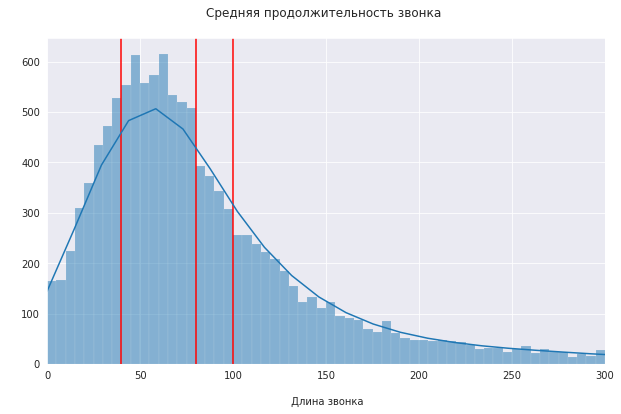

In [100]:
# построим график распределения средней продолжительности звонка

plt.figure(figsize=(10,6))
plt.axvline(x=40,color='red')
plt.axvline(x=80,color='red')
plt.axvline(x=100,color='red')
sns.histplot(operators_group['mean_duration'], binwidth=5,kde=True)
plt.xlim([0,300])
plt.title('Средняя продолжительность звонка \n')
plt.xlabel('\n Длина звонка')
plt.ylabel(' ')
plt.show()

Частота растет к значению продолжительности разговора 49 сек., потом идет относительное плато с двумя пиками на 50 и 60, далее резкий спад на 80,  угасание до 100 и второй резкий спад на 100, после этого плавное угасание до конца

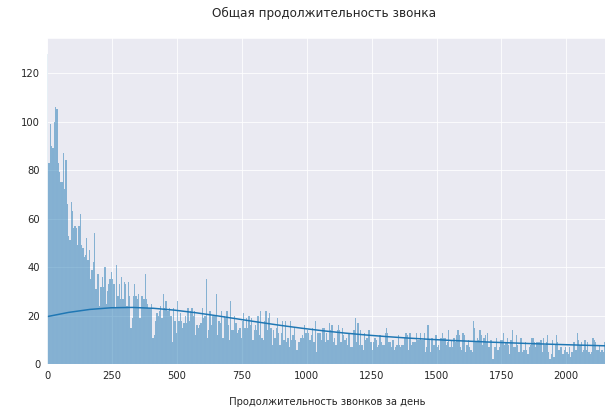

In [101]:
# построим график распределения общей продолжительности звонков за день

plt.figure(figsize=(10,6))
'''plt.axvline(x=40,color='red')
plt.axvline(x=80,color='red')'''
sns.histplot(operators_group['total_call_duration'], binwidth=5,kde=True)
plt.xlim([0,2150])
plt.title('Общая продолжительность звонка \n')
plt.xlabel('\n Продолжительность звонков за день')
plt.ylabel(' ')
plt.show()

In [102]:
operators_group.direction_out.agg(['mean','median','max'])

mean       27.685519
median     10.000000
max       310.000000
Name: direction_out, dtype: float64

In [103]:
operators_group.total_call_duration.agg(['mean','median','max'])

mean       2257.380826
median     1184.000000
max       16301.000000
Name: total_call_duration, dtype: float64

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Вот эти расчеты понятны, но они вообще никак не связаны с распределением мы фактически должны разделить продолжительность рабочего дня на среднюю подолжительность разговоров (одно число)
    
Вот уже порог эффективного разговора - это лишнее.
    
Я бы сказала, что 1 дозвон в 10 минут - это очень мягко, но возможно
</div>

За стандартный рабочий день оператор каждые 10 минут должен совершить дозвон и поговорить с абонентом. В час получится 6 звонков, за день 48 дозвонов.

Порог эффективного разговора назначим 50 секунд и более. Получается, эффективный оператор должен совершить 48 звонков и/или поговорить минимум 2400 секунд. В условии оставим AND, выполнение одного из нормативов будем считать признаком эффективности. Отфильтруем неэффективных операторов.

Сгруппируем `operators_group` по операторам и посчитаем среднее количество вызовов и среднюю продолжительность разговоров за день.

In [104]:
operators_group_all_days = operators_group.groupby('operator_id')\
          [['direction_out','total_call_duration']].agg(['mean'])
operators_group_all_days

,direction_out,total_call_duration
,mean,mean
operator_id,,
-1000,0.932203,2978.618644
879896,14.840000,1288.460000
879898,85.821429,4300.940476
880020,2.714286,180.357143
880022,4.500000,450.595238
...,...,...
972408,6.000000,245.000000
972410,38.500000,2637.500000


In [105]:
# убираем мульти-индекс

operators_group_all_days.columns =\
      ['_'.join(col).strip() for col in operators_group_all_days.columns.values]

In [106]:
# проверяем

operators_group_all_days

,direction_out_mean,total_call_duration_mean
operator_id,,
-1000,0.932203,2978.618644
879896,14.840000,1288.460000
879898,85.821429,4300.940476
880020,2.714286,180.357143
880022,4.500000,450.595238
...,...,...
972408,6.000000,245.000000
972410,38.500000,2637.500000
972412,30.000000,2274.000000


In [107]:
# фильтруем

ne_operators_out_df = operators_group_all_days\
 .query('direction_out_mean == 0 or (total_call_duration_mean < 2400 and direction_out_mean < 48)')
ne_operators_out_df

,direction_out_mean,total_call_duration_mean
operator_id,,
879896,14.840000,1288.460000
880020,2.714286,180.357143
880022,4.500000,450.595238
880026,28.675325,2279.558442
880240,6.714286,630.857143
...,...,...
969386,10.800000,470.200000
972408,6.000000,245.000000
972412,30.000000,2274.000000


In [108]:
# неэффективных операторов запишем в список ne_operators_out

ne_operators_out = ne_operators_out_df.index.tolist()
ne_operators_out[:5]

[879896, 880020, 880022, 880026, 880240]

In [109]:
len(ne_operators_out)

455

In [110]:
# КЦ с неэффективными операторами запишем в список ne_users_out

ne_users_out = df_out.query('operator_id in @ne_operators_out')['user_id'].unique().tolist()
ne_users_out[:5]

[166377, 166405, 166406, 166407, 166485]

In [111]:
display(f'Всего {len(ne_operators_out)} неэффективных операторов')
display(f'Это {len(ne_operators_out)/df_out["operator_id"].nunique():.2%} от всего количества операторов в обзванивающих КЦ')

display(f'Всего {len(ne_users_out)} КЦ с неэффективными операторами')
display(f'Это {len(ne_users_out)/df_out["user_id"].nunique():.2%} от всего количества обзванивающих КЦ')

'Всего 455 неэффективных операторов'

'Это 69.57% от всего количества операторов в обзванивающих КЦ'

'Всего 105 КЦ с неэффективными операторами'

'Это 92.92% от всего количества обзванивающих КЦ'

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Да, с количеством звонков все плохо
</div>

### Вывод по неэффективным операторам обзванивающих КЦ:

В нашей выборке из обванивающих КЦ всего 654 операторов в 113 КЦ

Для оценки неэффективности принмающих звонки КЦ использовали две метрики - количество исходящих вызовов и среднюю продолжительность вызовов за день.

Был выбран порог неэффективности менее 48 звонков в день в среднем и средняя продолжительность разговоров менее 2400 секунд в день

Итоги исследования:

- всего 455 неэффективных операторов
- это 69.57% от всего количества операторов в обзванивающих КЦ
- всего 105 КЦ с неэффективными операторами
- это 92.92% от всего количества обзванивающих КЦ

ID операторов сохранены в списке `ne_operators_out`.

ID КЦ с такими операторами в списке `ne_users_out`.

### Call-центры промежуточного типа

In [112]:
df_mid.head()

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,direction_in,direction_out,user_type
5958,166582,2019-08-12,False,885876,False,9,387,473,86,9,0,mid
5959,166582,2019-08-12,False,885890,True,113,0,3691,3691,0,113,mid
5960,166582,2019-08-12,False,885890,False,5,532,570,38,5,0,mid
5961,166582,2019-08-12,False,-1000,True,9,0,79,79,9,0,mid
5962,166582,2019-08-13,False,885876,False,12,613,745,132,12,0,mid


In [113]:
display(f'Всего {len(df_out)} записей')
display(f'В КЦ промежуточного типа работают {df_mid["operator_id"].nunique()} операторов')
display(f'Всего {df_mid["user_id"].nunique()} КЦ промежуточного типа')

'Всего 30636 записей'

'В КЦ промежуточного типа работают 155 операторов'

'Всего 41 КЦ промежуточного типа'

In [114]:
# Добавим столбец с количеством пропущенных звонков

df_mid['miss_count'] = df_mid['is_missed_call'] * df_mid['calls_count']

df_mid['duration_mean'] = df_mid['total_call_duration'] / (df_mid['direction_in'] + df_mid['direction_out'])

К операторам КЦ промежуточного типа логично применить комбинированные метрики для обзванивающих и принимающих звонки КЦ.

Т.е. неээфективными считаем операторов, пропускающих более одного звонка ИЛИ делающих менее 48 звонков и длина ежедневных дневных разговоров менее 2400 секунд.

In [115]:
df_mid.head()

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,direction_in,direction_out,user_type,miss_count,duration_mean
5958,166582,2019-08-12,False,885876,False,9,387,473,86,9,0,mid,0,52.555556
5959,166582,2019-08-12,False,885890,True,113,0,3691,3691,0,113,mid,113,32.663717
5960,166582,2019-08-12,False,885890,False,5,532,570,38,5,0,mid,0,114.000000
5961,166582,2019-08-12,False,-1000,True,9,0,79,79,9,0,mid,9,8.777778
5962,166582,2019-08-13,False,885876,False,12,613,745,132,12,0,mid,0,62.083333


In [116]:
df_mid_ne = df_mid.query('miss_count > 1 and direction_out < 48 and duration_mean < 2400')
df_mid_ne.head()

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,direction_in,direction_out,user_type,miss_count,duration_mean
5961,166582,2019-08-12,False,-1000,True,9,0,79,79,9,0,mid,9,8.777778
5966,166582,2019-08-13,False,-1000,True,6,0,35,35,6,0,mid,6,5.833333
5969,166582,2019-08-14,False,-1000,True,6,0,76,76,6,0,mid,6,12.666667
5972,166582,2019-08-15,False,-1000,True,16,0,186,186,16,0,mid,16,11.625000
5979,166582,2019-08-16,False,-1000,True,23,0,227,227,23,0,mid,23,9.869565


In [117]:
ne_operators_mid = df_mid_ne['operator_id'].unique().tolist()
ne_users_mid = df_mid_ne['user_id'].unique().tolist()

display(ne_operators_mid[:5])
display(ne_users_mid[:5])

[-1000, 885876, 885890, 925922, 899082]

[166582, 166708, 166717, 166725, 166774]

In [118]:
display(f'Всего {len(ne_operators_mid)} неэффективных операторов в КЦ промежуточного типа')
display(f'Это {len(ne_operators_mid)/df_mid["operator_id"].nunique():.2%} от всего количества операторов в обзванивающих КЦ')

display(f'Всего {len(ne_users_mid)} КЦ с неэффективными операторами')
display(f'Это {len(ne_users_mid)/df_mid["user_id"].nunique():.2%} от всего количества обзванивающих КЦ')

'Всего 132 неэффективных операторов в КЦ промежуточного типа'

'Это 85.16% от всего количества операторов в обзванивающих КЦ'

'Всего 41 КЦ с неэффективными операторами'

'Это 100.00% от всего количества обзванивающих КЦ'

### Выводы по промежуточным КЦ

Для оценки неэффективности КЦ промежуточного типа использовали комбинированные метрики для КЦ двух типов. 

По выбранным метрикам для КЦ промежуточного типа:

- всего 132 неэффективных операторов в КЦ промежуточного типа
- это 85.16% от всего количества операторов в обзванивающих КЦ
- всего 41 КЦ с неэффективными операторами
- это 100.00% от всего количества обзванивающих КЦ

ID операторов сохранены в списке `ne_operators_mid`.

ID КЦ с такими операторами в списке `ne_users_mid`.

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Хорошо. Мы на финальном созвоне обсудим, но лучше было делать два пересекающихся множества обзваниевающие и принимающие (т.е. чтобы колл-центр мог и туда и туда попасть). Тогда не пришлось бы лишней проверки делать

</div>

## Проверка гипотез

### Количество пропущенных звонков зависит от тарифа


Посчитаем среднее количество пропущенных вызовов для операторов на тарифах А и В.

<div class="alert alert-warning">
    
**Комментарий ревьюера**

**#можно лучше**

Тут стоило пояснить какой количетсво:  в день на оператора, суммарное за все время на оператора, в день на КЦ... 

</div>

<div class="alert alert-info">

<b>Студент: </b> Вера, поправил.
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

👍

</div>

In [119]:
# присоединяем таблицу с тарифами к основной таблице

df = df.merge(telecom_clients[['user_id','tariff_plan']],how='left',on='user_id')
df.head()

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,direction_in,direction_out,user_type,tariff_plan
0,166377,2019-08-04,False,-1000,True,2,0,4,4,2,0,out,B
1,166377,2019-08-05,True,880022,True,3,0,5,5,0,3,out,B
2,166377,2019-08-05,True,880020,True,1,0,1,1,0,1,out,B
3,166377,2019-08-05,True,880020,False,1,10,18,8,0,1,out,B
4,166377,2019-08-05,False,880022,True,3,0,25,25,0,3,out,B


In [120]:
# группируем дф по столбцу с тарифом и пропущенный/непропущенный

df_hyp1 = df.groupby(['tariff_plan','is_missed_call'])['operator_id'].agg(['count'])
df_hyp1.reset_index()

,tariff_plan,is_missed_call,count
0,A,False,7541
1,A,True,5342
2,B,False,9469
3,B,True,7688
4,C,False,9973
5,C,True,8100


Проверим, находят ли статистические критерии разницу между пропущенными вызовами на тарифах А и В с помощью z-теста.

Формулируем нулевую гипотезу H0 - доли операторов тарифах А и В, допустивших пропущенный звонок, равны. Альтернативная гипотеза H1 - доли операторов не равны.

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Т.е. ты гипотезу о долях проверяешь? 

А что у тебя success и что trials? Кажется ты не верные значения берешь
</div>

<div class="alert alert-info">

<b>Студент: </b> Вера, поправил.
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Да, теперь верно

</div>

In [121]:
# задаем функцию

def z_test(successes1, successes2, trials1, trials2, alpha=.05):
  # пропорция успехов в первой группе:
  p1 = successes1/trials1
  # пропорция успехов во второй группе:
  p2 = successes2/trials2
  # пропорция успехов в комбинированном датасете:
  p_combined = (successes1 + successes2) / (trials1 + trials2)
  # разница пропорций в датасетах
  difference = p1 - p2 
  # считаем статистику в ст.отклонениях стандартного нормального распределения
  z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / trials1 + 1 / trials2))
  # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
  distr = st.norm(0, 1)
  p_value = (1 - distr.cdf(abs(z_value))) * 2
  print('p-значение: ', p_value)
  if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
  else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

In [122]:
df_hyp1 = df_hyp1.reset_index()
df_hyp1

,tariff_plan,is_missed_call,count
0,A,False,7541
1,A,True,5342
2,B,False,9469
3,B,True,7688
4,C,False,9973
5,C,True,8100


In [123]:
z_test(df_hyp1.loc[1]['count'], df_hyp1.loc[3]['count'],\
       (df_hyp1.loc[1]['count'] + df_hyp1.loc[0]['count']),\
       (df_hyp1.loc[2]['count'] + df_hyp1.loc[3]['count']))

p-значение:  7.112386901653167e-09
Отвергаем нулевую гипотезу: между долями есть значимая разница


### Среднее время ожидания зависит от тарифа

Проверяем вторую гипотезу

Формулируем нулевую гипотезу H0 - среднее время ожидания операторов тарифах В и С равны. Альтернативная гипотеза H1 - среднее время ожидания операторов тарифах В и С не равно.

In [124]:
df_hyp2 = df.groupby('tariff_plan')['wait_time'].agg(['mean','count'])
df_hyp2

,mean,count
tariff_plan,,
A,329.659318,12883
B,158.511744,17157
C,151.192276,18073


In [125]:
z_test(df_hyp2.loc['B']['mean'], df_hyp2.loc['C']['mean'],df_hyp2.loc['B']['count'],df_hyp2.loc['C']['count'])

p-значение:  0.3801354756618518
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


<div class="alert alert-warning">
    
**Комментарий ревьюера**

**#можно лучше**

Хорошо. Хотя по полученным данным скорее В и С интереснее смотреть
</div>

<div class="alert alert-info">

<b>Студент: </b> Вера, поправил, результат кардинально изменился для обеих гипотез
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Так и должно быть

</div>

### Выводы по гипотезам

Первую нулевую гипотезу о том, что доли операторов тарифах А и В, допустивших пропущенный звонок, равны, отвергли.

Во втором случае не удалось отвергнуть нулевую гипотезу и между долями среднего времени ожидания на тарифах В и С есть значимая разница.

## Общие выводы

Работали с данными в двух таблицах. Первая содержала 53902 строк и 9 столбцов, во второй было 732 строк и 3 столбцов. 

В ходе подготовки данных к анализу из основной таблицы удалили 5010 строк с пропусками и дубликатами. Удаленные данные составили 9.29% от изначального объема. В обеих таблицах меняли типы данных в столбцах.

Особую проблему представляли пропуски в датафрейме `df` в столбце `operator_id`. Найти закономерность или общую черту у строк с пропущенными данными не удалось, данные строки были помечены маркером "-1000" в поле `operator_id`.

Для проведения анализа категорильный столбец `direction` разбили на два бинарных столбца, по которым и вели дальнейшие расчеты.

В ходе исседования разделили КЦ на три категории:
- обзванивающие
- принимающие звонки
- КЦ промежуточного типа

Для каждой категории были выбраны свои метрики неэффективности.

Для оценки неэффективности **принимающих звонки** КЦ использовали две метрики:
1. Количество пропущенных вызовов
2. Время ожидания клиентом оператора
Для пропущенных вызовов выбран порог более одного пропущенного звонка.
Для ожидания вызова установлена верхняя граница в 32 секунд, ожидание выше считаем признаокм неэффективной работы.
В наших данных для КЦ, в основном принимающих звонки:
- Всего 91 неэффективных операторов
- Что составляет 31.82%
- Всего 140 КЦ с неэффективными операторами
- Что составляет 91.50%

Всего 91 неэффективных операторов
Что составляет 31.82%
Всего 140 КЦ с неэффективными операторами
Что составляет 91.50%
ID операторов сохранены в списке `ne_operators_in`.
ID КЦ с такими операторами в списке `ne_users_in`.

Данные по операторам, заставляющих клиентов ждать чуть больше:
- Всего 121 операторов, отвечающих более 32 секунд
- Что составляет 42.31%
- Всего 83 КЦ с такими операторами
- Что составляет 54.25%
62 операторов попадают в оба списка неэффективности для принимающих КЦ.
ID операторов сохранены в списке `ne_operators_wait`.
ID КЦ с такими операторами в списке `ne_users_wait`.

Для оценки неэффективности **обзванивающих** КЦ использовали две метрики - количество исходящих вызовов и среднюю продолжительность вызовов за день (несоответствие одной из метрик — порого неэффективности).
Был выбран порог неэффективности менее 48 звонков в день в среднем и средняя продолжительность разговоров менее 2400 секунд в день.
Итоги исследования:
- всего 455 неэффективных операторов
- это 69.57% от всего количества операторов в обзванивающих КЦ
- всего 105 КЦ с неэффективными операторами
- это 92.92% от всего количества обзванивающих КЦ
ID операторов сохранены в списке `ne_operators_out`.
ID КЦ с такими операторами в списке `ne_users_out`.

Для оценки неэффективности КЦ промежуточного типа использовали комбинированные метрики для КЦ двух типов. 

По выбранным метрикам для КЦ промежуточного типа:
- всего 132 неэффективных операторов в КЦ промежуточного типа
- это 85.16% от всего количества операторов в обзванивающих КЦ
- всего 41 КЦ с неэффективными операторами
- это 100.00% от всего количества обзванивающих КЦ
ID операторов сохранены в списке `ne_operators_mid`.
ID КЦ с такими операторами в списке `ne_users_mid`.



Провели проверку двух гипотез о равенстве долей прпоущенных вызовов и времени ожидания вызова для операторов двух тарифов А и В.

**Первую нулевую гипотезу** о том, что доли операторов тарифах А и В, допустивших пропущенный звонок, равны, отвергли.

**Во втором** случае не удалось отвергнуть нулевую гипотезу и между долями среднего времени ожидания на тарифах В и С есть значимая разница.



<div class="alert alert-info">

<b>Студент: </b> Поправил выводы
</div>

## Рекомендации заказчику

Мы вывели общие алгоритмы оценки неэффективности работы операторов. Работа была осложнена смешанным составом КЦ и общей неоднородностью операторов. В КЦ, занимающемся в основном обзвоном, работают операторы, не сделавшие ни одного исходящего звонка, и наоборот.

Неоднородность данных и значительное количество пропусков и дубликатов значительно снизила точность алгоритмов оценки. 
Рекомендую в дальнейшем:
1. Вести лог чище, без дублирования и пропусков
2. Рекомендовать клиентам делать КЦ с узкой направленностью
3. Если бизнес клиента подразумевает и входящие, и исходящие вызовы, разделить штат операторов на несколько КЦ, занимающихся исключительно одним направлением деятельности
4. Предоставлять, по возможности, для анализа лог не в аггрегированном виде, а в "сыром" состоянии, для более детального изучения деятельности оператора. Очень многие параметры выведены как среднее по все сессии.


<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

В этой части рекомендации соответствуют задаче


</div>



<div class="alert alert-warning">
    
**Комментарий ревьюера**

**#можно лучше**

А вот это лишнее, не относится к нашей задаче. Наш заказчик не имеет доступа к операторам, не может определять нормы для них, никак не влияет на штат.
    
</div>


<div class="alert alert-info">

<b>Студент: </b> Убрал лишнее
</div>

<div class="alert alert-info">

<b>Студент: </b> Вера, спасибо за феномаенально быстрые проверки! Другие тимлиды этим не отличаются. И спасибо за помощь в нахождении порога для исходящих.
</div>

<div class="alert alert-info">

<b>Студент: </b> Жду с проверки и потом отправлю с презентацией, пока на 100% не уверен.
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Ссылку на презентацию добавь в следующую часть вместе с дашбордами

</div>